In [ ]:
from backend.efield.efield4 import *
from backend.utils.frequency_sweep import *
from backend.utils.efield_1_sweep import *
from backend.src.scattering_algorithm.scattering_from_E_field_antenna import Scattering_E_field_from_antenna, plot_PowerConjMatch

In [2]:
filename_mesh = 'data/antennas_mesh/slot_antenna01.mat'
feed_point = np.array([0, 0, 0])

In [ ]:
StartFreq   = 12.5e6
StopFreq    = 6250e6
NumberOfSteps = 500
step=(StopFreq - StartFreq) / (NumberOfSteps - 1)
print(f"StartFreq: {StartFreq}, StopFreq: {StopFreq}, step: {step}")

In [ ]:
frequencies = generate_freq_step(StartFreq, StopFreq, step=step)

result_freq_sweep = frequency_sweep(filename_mesh, frequencies, feed_point)

In [ ]:
frequencies, impedances, s11_db, currents, *_ = load_freq_sweep_data(result_freq_sweep)
# plot_smith_chart(impedances, frequencies)
plot_impedance_curve(impedances, StartFreq, StopFreq)
plot_s11_curve(s11_db, StartFreq, StopFreq)

In [ ]:
mesh2_filename = 'data/antennas_mesh2/slot_antenna01_mesh2.mat'
observation_point = np.array([0, 0, 1])

e_fields, h_fields = efield_1_sweep(mesh2_filename, frequencies, currents, observation_point)
plot_efield_components(frequencies, e_fields)
plot_ey_phase(frequencies, e_fields)

In [ ]:
radiatedfield_1_sweep_filename = 'data/antennas_sweep/slot_antenna01_radiatedfield_1_sweep.mat'

Scattering_E_field_from_antenna(filename_mesh, radiatedfield_1_sweep_filename, impedances, feed_point)

In [ ]:
Scattering_E_field_from_antenna_filename = 'data/antennas_sweep/slot_antenna01_scattering_from_slot_antenna01_sweep'
plot_PowerConjMatch(Scattering_E_field_from_antenna_filename)

In [7]:
radiation_algorithm(filename_mesh, 500e6, feed_point, show=True)

(np.complex128(0.16134316609712931+97.95789068007626j),
 array([ 5.40365828e-04+6.26671497e-02j, -7.22126571e-04-6.57304162e-02j,
         1.37417285e-03+8.67201952e-01j, -1.28277147e-03-8.11126714e-01j,
         1.10950329e-04-5.32651711e-01j,  2.92769757e-05+6.17884068e-01j,
        -1.68112671e-04+1.78920249e-03j, -1.96396663e-03-1.05416690e+00j,
         1.96110204e-03+1.05265574e+00j,  1.44581788e-07+7.99239661e-05j,
        -9.27445832e-04-7.70810485e-01j,  3.86536652e-04+5.16176718e-01j,
         2.45644778e-04+1.70196062e-02j,  4.53661501e-04+6.30159450e-01j,
        -5.15002894e-04-7.00915896e-01j, -7.90060794e-04-6.51580984e-01j,
        -1.27860305e-03-8.08612718e-01j,  3.74163674e-04+8.63616924e-02j,
        -1.19427367e-04-5.64005817e-01j, -1.09811175e-04+5.41759201e-01j,
         1.82226247e-04+4.30035830e-02j, -3.40927625e-03+2.17009271e+00j,
         2.96659942e-03-1.90360959e+00j,  1.68139808e-02-1.02084404e+01j,
        -8.65610088e-03+5.27578146e+00j, -8.77320838e-03

Calculating radiation intensity distribution over sphere surface...

Frequency = 500000000.0 Hz
Longueur d'onde lambda = 0.5995047079612185 m

Total Power :  0.000009
Gain Linear :  2.769513
Gain Logarithmic :  4.424034 dB

gap_current = (1.68139807940084e-05-0.01020844038429764j)
Radiation Resistance :  0.166409 Ohms
Data saved successfully to data/antennas_gain_power/slot_antenna01_gain_power.mat


Generating antenna directivity pattern...
Data loaded from data/antennas_gain_power/slot_antenna01_gain_power.mat


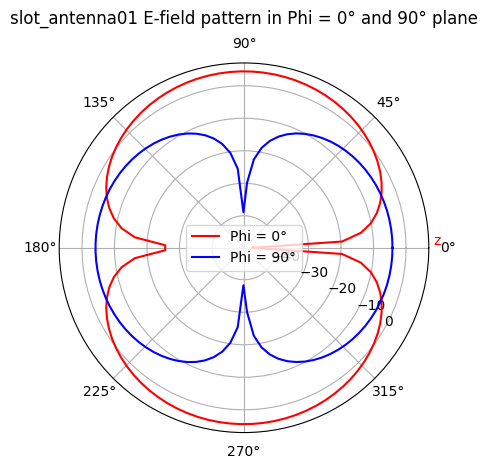

In [ ]:
from efield.efield2 import radiation_intensity_distribution_over_sphere_surface
from efield.efield3 import antenna_directivity_pattern


filename_sphere_dense = '../../data/sphere_mesh/sphere_dense.mat'

mesh2_mat = 'data/antennas_mesh2/slot_antenna01_mesh2.mat'
current_mat = 'data/antennas_current/slot_antenna01_current.mat'
gain_power_mat = 'data/antennas_gain_power/slot_antenna01_gain_power.mat'

print("Calculating radiation intensity distribution over sphere surface...")
radiation_intensity_distribution_over_sphere_surface(mesh2_mat, current_mat, filename_sphere_dense, radiation=True)

# Step 3: Generating the directivity pattern
print("Generating antenna directivity pattern...")
antenna_directivity_pattern(mesh2_mat, current_mat, gain_power_mat, radiation=True)